In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import json
import glob, os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from scipy import stats

%matplotlib notebook
plt.rcParams.update({'font.size': 10})

In [2]:
def define_plot_pos(ax):
    ax.set_xlabel('x (m)')
    ax.set_ylabel('y (m)')
    ax.set_zlabel('z (m)')
    ax.set_xlim(-4,4)
    ax.set_ylim(-4,4)
    ax.set_zlim(0,6)
    plt.legend()
    plt.show()

In [3]:
def define_plot_col(ax):
    plt.xlabel('Time (s)')
    plt.ylabel('Collisions (bool)')
    plt.legend()
    plt.show()

# Plots for the learning curve experiment

In [4]:
def dfFromJSON(file):
    with open(file) as f:
        temp = []
        for line in f:
            temp.append(json.loads(line))
            
    df = pd.io.json.json_normalize(temp[0]['allLogs'])
    df.columns = df.columns.map(lambda x: x.split("*.")[-1])
    return df

In [5]:
def appendToLogs(file, log, _type):
    df = dfFromJSON(file)
    log[_type].append(df)

In [6]:
path_to_folder = "./Learning_Curve/"
subjects = glob.glob(path_to_folder + "*/")

logs = {}
for curr in subjects:
    logs[curr] = []
    
subjects

['./Learning_Curve\\sub01_Controller\\',
 './Learning_Curve\\sub01_MotionCapture\\',
 './Learning_Curve\\sub02_Controller\\',
 './Learning_Curve\\sub02_MotionCapture\\',
 './Learning_Curve\\sub03_Controller\\',
 './Learning_Curve\\sub03_MotionCapture\\',
 './Learning_Curve\\sub04_Controller\\',
 './Learning_Curve\\sub04_MotionCapture\\',
 './Learning_Curve\\sub05_Controller\\',
 './Learning_Curve\\sub05_MotionCapture\\']

In [7]:
# # used to remove outliers

# subjects.remove(subjects[5])
# subjects.remove(subjects[4])

# logs = {}
# for curr in subjects:
#     logs[curr] = []
    
# subjects

In [8]:
EXP_N = 5

for subject in subjects:
    print(subject)
    files = glob.glob(subject+"*.json")
    files.sort()
    
    if len(files) != EXP_N:
        print('wrong number of experiments!')
        break
    for file in files:
        logs[subject].append(dfFromJSON(file))

./Learning_Curve\sub01_Controller\
./Learning_Curve\sub01_MotionCapture\
./Learning_Curve\sub02_Controller\
./Learning_Curve\sub02_MotionCapture\
./Learning_Curve\sub03_Controller\
./Learning_Curve\sub03_MotionCapture\
./Learning_Curve\sub04_Controller\
./Learning_Curve\sub04_MotionCapture\
./Learning_Curve\sub05_Controller\
./Learning_Curve\sub05_MotionCapture\


In [9]:
fields = ['first_motion', 'last_motion', 'first_remote', 'last_remote']

sub_remote = [x for x in subjects if 'Controller' in x]
sub_motion = [x for x in subjects if 'Motion' in x]

logs['first_motion'] = [logs[x][0] for x in sub_motion]
logs['last_motion'] = [logs[x][-1] for x in sub_motion]
logs['first_remote'] = [logs[x][0] for x in sub_remote]
logs['last_remote'] = [logs[x][-1] for x in sub_remote]

In [32]:
def runBasicAnalysis(f):
    
    var = {}

    var['means'] = []
    var['stds'] = []

    for i in fields:
        var[i] = []
        for j in logs[i]:
            var[i].append(f(j))
        print(i)
        print(var[i])

        var['means'].append(np.mean(var[i]))
        var['stds'].append(np.std(var[i]))

        print(var['means'][-1])
        print(var['stds'][-1])

        print()
    for i in fields:
        for j in fields:
            t, p = stats.ttest_ind(var[i],var[j])

            print (i,j)
            print (p)
            print()
            
    var['diff_mot'] = 1-np.array(var['last_motion'])/np.array(var['first_motion'])
    var['diff_rem'] = 1-np.array(var['last_remote'])/np.array(var['first_remote'])

    # var['diff_mot'] = np.array(var['last_motion'])-np.array(var['first_motion'])
    # var['diff_rem'] = np.array(var['last_remote'])-np.array(var['first_remote'])


    print('motion ratio')
    print(var['diff_mot'])
    print(np.mean(var['diff_mot']))
    print(np.std(var['diff_mot']))
    print()
    print('remote ratio')
    print(var['diff_rem'])
    print(np.mean(var['diff_rem']))
    print(np.std(var['diff_rem']))

    t, p = stats.ttest_ind(var['diff_mot'], var['diff_rem'])

    print()
    print('p = ', p)
            
    return var

# Plot Trajectories

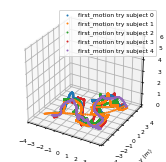

No handles with labels found to put in legend.


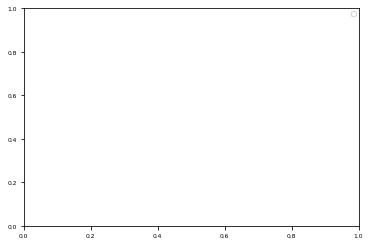

No handles with labels found to put in legend.


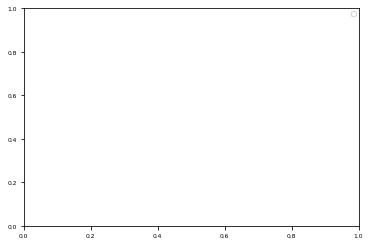

No handles with labels found to put in legend.


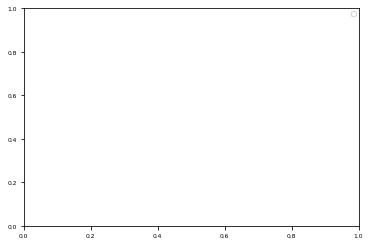

In [28]:
fig = plt.figure(figsize=(6,6))

plt.rcParams.update({'font.size': 6})

for idx,i in enumerate(fields):
    ax = fig.add_subplot(221+idx, projection='3d')
    for idx1,log in enumerate(logs[i]):
        ax.scatter(log['dronePosition.x'],log['dronePosition.z'],log['dronePosition.y'], s = 1, label=fields[idx] + ' try subject ' + str(idx1))
    define_plot_pos(ax)

# Collisions

In [11]:
def compColl(df):
    n = 0
    
    n += np.sum(np.diff(df['collision'])==1)
    
    return n

In [41]:
coll = runBasicAnalysis(compColl)

first_motion
[0, 0, 9, 8, 4]
4.2
3.815756805667783

last_motion
[0, 0, 0, 18, 2]
4.0
7.042726744663604

first_remote
[0, 0, 44, 5, 2]
10.2
16.99882348870062

last_remote
[2, 0, 5, 4, 22]
6.6
7.889233169326409

first_motion first_motion
1.0

first_motion last_motion
0.9613963943074308

first_motion first_remote
0.5104326953613093

first_motion last_remote
0.5988271366972893

last_motion first_motion
0.9613963943074308

last_motion last_motion
1.0

last_motion first_remote
0.5193597745521724

last_motion last_remote
0.6361343098301989

first_remote first_motion
0.5104326953613093

first_remote last_motion
0.5193597745521724

first_remote first_remote
1.0

first_remote last_remote
0.7108422705693709

last_remote first_motion
0.5988271366972893

last_remote last_motion
0.6361343098301989

last_remote first_remote
0.7108422705693709

last_remote last_remote
1.0

motion ratio
[  nan   nan  1.   -1.25  0.5 ]
nan
nan

remote ratio
[        -inf          nan   0.88636364   0.2        -10.      

C:\Users\SymbioticDrone\.conda\envs\bidir\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: invalid value encountered in true_divide
C:\Users\SymbioticDrone\.conda\envs\bidir\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\SymbioticDrone\.conda\envs\bidir\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in true_divide
C:\Users\SymbioticDrone\.conda\envs\bidir\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\SymbioticDrone\.conda\envs\bidir\lib\site-packages\scipy\stats\_distn_infrastructure.py:901: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\SymbioticDrone\.conda\envs\bidir\lib\site-packages\scipy\stats\_distn_infrastructure.py:1892: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


# Time analysis

In [13]:
def compTime(df):
    return df['absoluteTime'].iloc[-1] - df['absoluteTime'].iloc[0]

first_motion
[26.73883819580078, 56.83778762817383, 108.18965148925781, 52.7387809753418, 37.28846740722656]
56.35870513916016
28.074154859673175

last_motion
[18.48773193359375, 42.438934326171875, 87.2391357421875, 55.088836669921875, 34.08905029296875]
47.46873779296875
23.168789873738124

first_remote
[36.68891906738281, 73.68862915039062, 216.49090766906738, 39.73820495605469, 39.23795127868652]
81.1689224243164
69.02343930554017

last_remote
[25.53936767578125, 29.975521087646484, 85.63897705078125, 25.188079833984375, 48.438262939453125]
42.956041717529295
22.9757378039666

first_motion first_motion
1.0

first_motion last_motion
0.6383303500312638

first_motion first_remote
0.5241968078029884

first_motion last_remote
0.48108144589275037

last_motion first_motion
0.6383303500312638

last_motion last_motion
1.0

last_motion first_remote
0.381665805604571

last_motion last_remote
0.7890968189010922

first_remote first_motion
0.5241968078029884

first_remote last_motion
0.381665805

<BarContainer object of 2 artists>

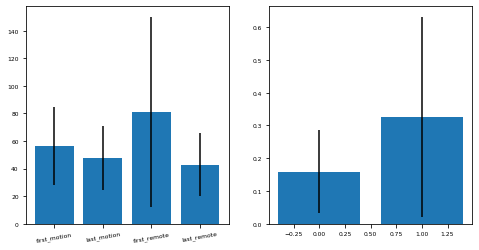

In [34]:
time = runBasicAnalysis(compTime)

motion ratio
[ 0.30858133  0.2533324   0.19364621 -0.0445603   0.08580179]
0.15936028624364995
0.12591080961267762

remote ratio
[ 0.30389425  0.59321375  0.60442229  0.36614953 -0.23447482]
0.3266409994438796
0.30500910891250715

p =  0.34031148204942907


<BarContainer object of 2 artists>

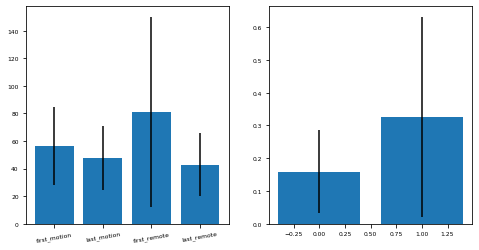

In [35]:
size = 6

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(121)
ax.bar([0, 1, 2, 3],
   time['means'],
   yerr=time['stds'])

plt.xticks(range(4), fields, rotation = 10)

ax = fig.add_subplot(122)
ax.bar([0, 1],
   [np.mean(time_diff_mot), np.mean(time_diff_rem)],
   yerr=[np.std(time_diff_mot), np.std(time_diff_rem)])

# Distance Analysis

In [17]:
def compDist(df):
    x = df['dronePosition.x'].values
    y = df['dronePosition.y'].values
    z = df['dronePosition.z'].values

    dx = np.diff(x)
    dy = np.diff(y)
    dz = np.diff(z)

    dd = np.sqrt(dx**2+dy**2+dz**2)
    d = np.sum(dd)

    return d

In [48]:
dist = runBasicAnalysis(compDist)

first_motion
[16.053804174306094, 41.36193720640945, 23.939916037526565, 22.414105877627115, 18.058243756456637]
24.365601410465175
8.963634388020512

last_motion
[13.36830039996769, 18.969954646929708, 26.745523663438007, 26.065930820392886, 22.15887051552975]
21.46171600925161
4.925762736278642

first_remote
[22.431195229861675, 47.653193732780935, 106.53574981271089, 27.390669342297787, 26.560770421352082]
46.11431570780068
31.454488096079242

last_remote
[16.36552673939378, 18.975108878019675, 28.69784644520929, 16.63350523746471, 39.47326759826643]
24.029050979670778
8.936302472883918

first_motion first_motion
1.0

first_motion last_motion
0.5857254334795899

first_motion first_remote
0.22021002058312822

first_motion last_remote
0.9588929802101428

last_motion first_motion
0.5857254334795899

last_motion last_motion
1.0

last_motion first_remote
0.1600610837900003

last_motion last_remote
0.6283804040018935

first_remote first_motion
0.22021002058312822

first_remote last_motion

<BarContainer object of 2 artists>

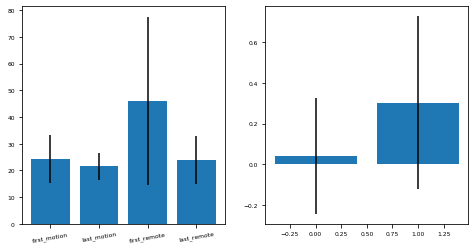

In [50]:
size = 6

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(121)
ax.bar([0, 1, 2, 3],
   dist['means'],
   yerr=dist['stds'])

plt.xticks(range(4), fields, rotation = 10)

ax = fig.add_subplot(122)
ax.bar([0, 1],
   [np.mean(dist['diff_mot']), np.mean(dist['diff_rem'])],
   yerr=[np.std(dist['diff_mot']), np.std(dist['diff_rem'])])

# Energy Analysis

In [46]:
def compEnergy(df):
    df['controlInput'] = np.abs(np.linalg.norm(np.array([df['controlSpeed.x'],df['controlSpeed.y'],df['controlSpeed.z']]), axis=0))#*df['differentialTime']
    return df['controlInput'].sum()/df.shape[1]

In [47]:
energy = runBasicAnalysis(compEnergy)

first_motion
[39.986809181976845, 90.10932193752976, 58.129583091957, 57.57083761924372, 48.33891012163767]
58.82709239046899
17.003533864389233

last_motion
[30.89370844420996, 50.69601680891306, 66.75253299728755, 77.57227426692354, 60.38886050051367]
57.26067860356956
15.816154020913396

first_remote
[49.80949699325341, 94.01344146382796, 215.85141989721816, 67.49605366932255, 66.38905774785047]
98.71189395429452
60.256755384933875

last_remote
[37.95559249547812, 40.996812319475545, 59.325529449885295, 39.22921448139685, 98.23554372624483]
55.14853849449613
22.905156171369335

first_motion first_motion
1.0

first_motion last_motion
0.8960182582689197

first_motion first_remote
0.23840119408026636

first_motion last_remote
0.8029918108245386

last_motion first_motion
0.8960182582689197

last_motion last_motion
1.0

last_motion first_remote
0.219951967244055

last_motion last_remote
0.8831331724249967

first_remote first_motion
0.23840119408026636

first_remote last_motion
0.21995196

<BarContainer object of 2 artists>

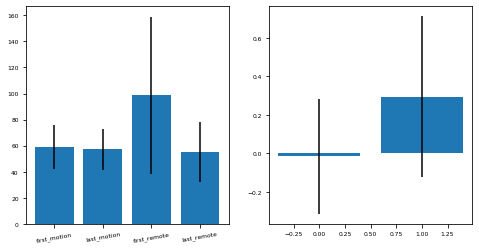

In [51]:
size = 6

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(121)
ax.bar([0, 1, 2, 3],
   energy['means'],
   yerr=energy['stds'])

plt.xticks(range(4), fields, rotation = 10)

ax = fig.add_subplot(122)
ax.bar([0, 1],
   [np.mean(energy['diff_mot']), np.mean(energy['diff_rem'])],
   yerr=[np.std(energy['diff_mot']), np.std(energy['diff_rem'])])

In [56]:
def compDEnergy(df):
    dEnergy = np.abs(np.diff(df['controlInput']))
    return np.sum(dEnergy)

In [57]:
dEnergy = runBasicAnalysis(compDEnergy)

first_motion
[63.89708104891014, 140.81729030211548, 132.6097309121168, 161.96121083294986, 73.19188788080086]
114.49544019537863
38.833346715287426

last_motion
[37.69626524692417, 91.0589173332078, 168.15078105373863, 189.60518874651882, 114.75514273677597]
120.25325902343309
54.40966617027013

first_remote
[36.25574636062577, 56.51785748187329, 136.3057476224725, 42.77649556192982, 39.10303337568175]
62.19177608051662
37.703567271340305

last_remote
[24.458194125910843, 29.334643758668413, 45.97804557594216, 25.211552041192338, 49.580605748153786]
34.9126082499735
10.696850077767344

first_motion first_motion
1.0

first_motion last_motion
0.8675034708990068

first_motion first_remote
0.08935100929681747

first_motion last_remote
0.0042270302204176335

last_motion first_motion
0.8675034708990068

last_motion last_motion
1.0

last_motion first_remote
0.11747648168386045

last_motion last_remote
0.015161767676107116

first_remote first_motion
0.08935100929681747

first_remote last_moti

<BarContainer object of 2 artists>

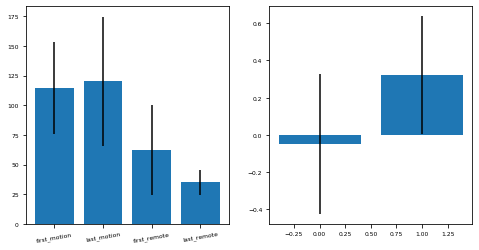

In [58]:
size = 6

fig = plt.figure(figsize=(8, 4))
ax = fig.add_subplot(121)
ax.bar([0, 1, 2, 3],
   dEnergy['means'],
   yerr=dEnergy['stds'])

plt.xticks(range(4), fields, rotation = 10)

ax = fig.add_subplot(122)
ax.bar([0, 1],
   [np.mean(dEnergy['diff_mot']), np.mean(dEnergy['diff_rem'])],
   yerr=[np.std(dEnergy['diff_mot']), np.std(dEnergy['diff_rem'])])

# Analyze collisions for learning curve experiment

In [ ]:
av_collisions = {"Controller_First" : 0,
                      "Controller_Last" : 0,
                      "MotionCapture_First" : 0,
                      "MotionCapture_Last" : 0}

In [ ]:
# sum number of collisions per type
for setup in logs:
    print('processing '+setup)
    temp = 0
    for df in logs[setup]:
        temp += np.sum(np.diff(df['collision'])==1)
    av_collisions[setup] = temp / len(logs[setup])

In [ ]:
fig = plt.figure()
plt.bar(av_collisions.keys(), av_collisions.values(), color='g')
plt.ylabel('Mean number of collisions per subject')
plt.show()